![CF](https://dataconomy.com/wp-content/uploads/2015/03/Beginners-Guide-Recommender-Systems-Collaborative-Filtering-620x340.jpg)

# **Collaborative Filtering**
+ **predicting** what **users** will **like** based on their **similarity to other users.**
+ **Advantages:** capable of accurately recommending complex items such as movies without requiring an “understanding” of the item itself. 
+ many  have been used in measuring (**user similarity** or **item similarity**) in **recommender systems.** 
+ **Task 1**: finding similar animes
+ **Task 2**: finding similar users
+ **Task 3**: Recommending Animes for a random user

In [1]:
INPUT_DIR = '/kaggle/input/anime-recommendation-database-2020'
!ls {INPUT_DIR}

 anime.csv		   animelist.csv   rating_complete.csv
 anime_with_synopsis.csv  'html folder'    watching_status.csv


In [2]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        #, nrows=90000000
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


# Data Preprocessing

In [3]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [4]:
# Scaling ratings BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print(f'Avg {AvgRating:.2f}')

Avg 0.40


In [5]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


![](https://content.codecademy.com/programs/code-foundations-path/ds-survey/utilitymatrix.gif)

In [6]:
# inspect the top 20 active users and the top 20 popular animes
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


In [7]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)} # To convert model outputs (which use encoded IDs) back to the original IDs for interpretation.
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [8]:
rating_df.head()

,user_id,anime_id,rating,user,anime
213,2,24833,0.0,0,0
214,2,235,1.0,0,1
215,2,36721,0.0,0,2
216,2,40956,0.0,0,3
217,2,31933,0.0,0,4


In [9]:
# Train-test split

from sklearn.model_selection import train_test_split

train_list = []
test_list = []

for user, group in rating_df.groupby('user_id'): # without groupby Some users may end up ONLY in train or ONLY in test
    
    train_g, test_g = train_test_split(
        group, 
        test_size=0.01,   # 1% test per user
        random_state=42,
        shuffle=True
    )
    
    train_list.append(train_g)
    test_list.append(test_g)

train_df = pd.concat(train_list)
test_df  = pd.concat(test_list)

print("Train size:", len(train_df))
print("Test size:", len(test_df))

X_train = train_df[['user', 'anime']].values
y_train = train_df['rating'].values

X_test  = test_df[['user', 'anime']].values
y_test  = test_df['rating'].values

X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array  = [X_test[:, 0], X_test[:, 1]]


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Train size: 70656142
Test size: 761971


In [10]:
train_df.head()

,user_id,anime_id,rating,user,anime
417,2,31518,0.0,0,204
368,2,7053,0.0,0,155
268,2,32182,0.9,0,55
533,2,37233,0.0,0,320
222,2,24,0.0,0,9


In [15]:
# Accelerator check
import tensorflow as tf

USE_GPU = True

try:
    if USE_GPU:
        gpus = tf.config.list_physical_devices('GPU')
        if len(gpus) > 0:
            print(f"> Found {len(gpus)} GPU(s):")
            for i, gpu in enumerate(gpus):
                print(f"  GPU {i} → {gpu.name}")
            
            # Optional: Set memory growth for each GPU
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)

            # MirroredStrategy for multi-GPU (T4x2)
            gpu_strategy = tf.distribute.MirroredStrategy()
            print("> Using MirroredStrategy for multi-GPU training")
        else:
            print("> No GPU found. Running on CPU.")
            gpu_strategy = tf.distribute.get_strategy()
    else:
        print("> GPU disabled manually")
        gpu_strategy = tf.distribute.get_strategy()

except Exception as e:
    print(f"> Error initializing GPU: {e}")

print("TensorFlow version:", tf.__version__)


> Found 2 GPU(s):
  GPU 0 → /physical_device:GPU:0
  GPU 1 → /physical_device:GPU:1
> Using MirroredStrategy for multi-GPU training
TensorFlow version: 2.11.0


# **Model Building**

In [16]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [17]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

# if TPU_INIT:    
    # with tpu_strategy.scope():
if USE_GPU:
    with gpu_strategy.scope():
        model = RecommenderNet()
else:
    model = RecommenderNet()

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 user (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 anime (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 user_embedding (Embedding)     (None, 1, 128)       11730048    ['user[0][0]']                   
                                                                                                  
 anime_embedding (Embedding)    (None, 1, 128)       2247680     ['anime[0][0]']                  
                                                                                              

In [18]:
# Callbacks for Learning rate schedule, Saves the best model weights, Early stopping
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

# Learning rate configuration
start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

# TPU scaling
# if TPU_INIT:
#     max_lr = max_lr * tpu_strategy.num_replicas_in_sync
#     batch_size = batch_size * tpu_strategy.num_replicas_in_sync

if USE_GPU:
    max_lr = max_lr * gpu_strategy.num_replicas_in_sync
    batch_size = batch_size * gpu_strategy.num_replicas_in_sync

# Learning rate schedule parameters
rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

# Learning rate function
def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

# Saves the best model weights
checkpoint_filepath = './weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

# Early stopping callback
early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [19]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

Epoch 1/20
3533/3533 [==============================] - 138s 36ms/step - loss: 0.6929 - mae: 0.3638 - mse: 0.1572 - val_loss: 0.6905 - val_mae: 0.3635 - val_mse: 0.1559 - lr: 1.0000e-05
Epoch 2/20
3533/3533 [==============================] - 62s 18ms/step - loss: 0.6863 - mae: 0.3636 - mse: 0.1539 - val_loss: 0.6832 - val_mae: 0.3642 - val_mse: 0.1523 - lr: 2.8000e-05
Epoch 3/20
3533/3533 [==============================] - 60s 17ms/step - loss: 0.6206 - mae: 0.3115 - mse: 0.1238 - val_loss: 0.5710 - val_mae: 0.2655 - val_mse: 0.1024 - lr: 4.6000e-05
Epoch 4/20
3533/3533 [==============================] - 59s 17ms/step - loss: 0.5403 - mae: 0.2421 - mse: 0.0903 - val_loss: 0.5343 - val_mae: 0.2342 - val_mse: 0.0886 - lr: 6.4000e-05
Epoch 5/20
3533/3533 [==============================] - 58s 16ms/step - loss: 0.5098 - mae: 0.2163 - mse: 0.0793 - val_loss: 0.5138 - val_mae: 0.2154 - val_mse: 0.0814 - lr: 8.2000e-05
Epoch 6/20
3533/3533 [==============================] - 59s 17ms/step - lo

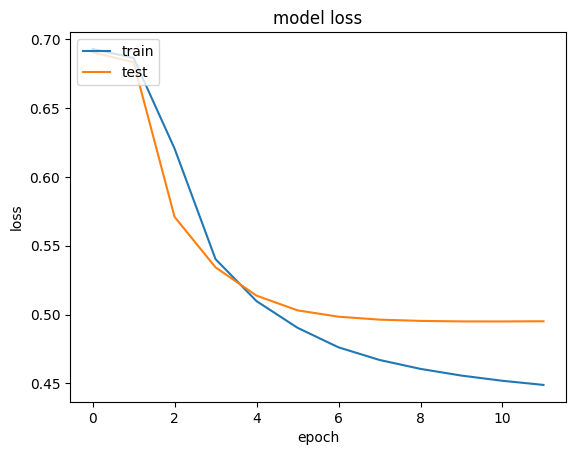

In [20]:
#Training results
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history["loss"][0:-2])
plt.plot(history.history["val_loss"][0:-2])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

## **Extracting weights from model**

In [21]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model) # Embedding for all animes
user_weights = extract_weights('user_embedding', model) # Embedding for all users

### **anime meta data**

In [22]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)
df.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",NaN,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


In [23]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

df.head()

,anime_id,eng_version,Score,Genres,Episodes,Type,Premiered,Members
3971,5114,Fullmetal Alchemist:Brotherhood,9.19,"Action, Military, Adventure, Comedy, Drama, Ma...",64,TV,Spring 2009,2248456
15926,40028,Attack on Titan Final Season,9.17,"Action, Military, Mystery, Super Power, Drama,...",16,TV,Winter 2021,733260
5683,9253,Steins;Gate,9.11,"Thriller, Sci-Fi",24,TV,Spring 2011,1771162
14963,38524,Attack on Titan Season 3 Part 2,9.1,"Action, Drama, Fantasy, Military, Mystery, Sho...",10,TV,Spring 2019,1073626
9913,28977,Gintama Season 4,9.1,"Action, Comedy, Historical, Parody, Samurai, S...",51,TV,Spring 2015,404121


In [24]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **sypnopsis data**

In [25]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

sypnopsis_df.head()

,MAL_ID,Name,Genres,sypnopsis
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


# **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [26]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

### **these animes are my fav**

![](https://i.pinimg.com/originals/1f/cb/2a/1fcb2af4376fe78b6d82197bd1fdbff6.gif)

In [27]:
find_similar_animes('Dragon Ball Z', n=5, neg=False)

animes closest to Dragon Ball Z


,name,similarity,genre,sypnopsis
4,Dragon Ball,0.973189,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Gokuu Son is a young boy who lives in the woods all alone—that is, until a girl named Bulma runs into him in her search for a set of magical objects called the ""Dragon Balls."" Since the artifacts are said to grant one wish to whoever collects all seven, Bulma hopes to gather them and wish for a perfect boyfriend. Gokuu happens to be in possession of a dragon ball, but unfortunately for Bulma, he refuses to part ways with it, so she makes him a deal: he can tag along on her journey if he lets her borrow the dragon ball's power. With that, the two set off on the journey of a lifetime. They don't go on the journey alone. On the way, they meet the old Muten-Roshi and wannabe disciple Kuririn, with whom Gokuu trains to become a stronger martial artist for the upcoming World Martial Arts Tournament. However, it's not all fun and games; the ability to make any wish come true is a powerful one, and there are others who would do much worse than just wishing for a boyfriend. To stop those who would try to abuse the legendary power, they train to become stronger fighters, using their newfound strength to help the people around them along the way."
3,Dragon Ball GT,0.905631,"Action, Sci-Fi, Adventure, Comedy, Super Power, Magic, Fantasy, Shounen","Emperor Pilaf finally has his hands on the Black Star Dragon Balls after years of searching, which are said to be twice as powerful as Earth's normal ones. Pilaf is about to make his wish for world domination when he is interrupted by Gokuu Son. As a result, Pilaf flubs his wish and accidentally turns Gokuu back into a child. After the wish is granted, the Black Star Dragon Balls scatter across the galaxy. However, Gokuu discovers that they will cause the Earth to explode unless they are all brought back within a year. Uniting with his granddaughter Pan and a young adult Trunks, Gokuu sets off on an adventure through the universe to find the Black Star Dragon Balls and save his planet from destruction."
2,Naruto,0.809991,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to become the Hokage of Konohagakure leads him not only to some great new friends, but also some deadly foes."
1,Dragon Ball Z Kai,0.808838,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after the events of Dragon Ball, martial arts expert Gokuu is now a grown man married to his wife Chi-Chi, with a four-year old son named Gohan. While attending a reunion on Turtle Island with his old friends Master Roshi, Krillin, Bulma and others, the festivities are interrupted when a humanoid alien named Raditz not only reveals the truth behind Gokuu's past, but kidnaps Gohan as well. With Raditz displaying power beyond anything Gokuu has seen before, he is forced to team up with his old nemesis, Piccolo, in order to rescue his son. But when Gokuu and Piccolo reveal the secret of the seven mystical wish-granting Dragon Balls to Raditz, he informs the duo that there is more of his race, the Saiyans, and they won’t pass up an opportunity to seize the power of the Dragon Balls for themselves. These events begin the saga of Dragon Ball Kai , a story that finds Gokuu and his friends and family constantly defending the galaxy from increasingly more powerful threats. Bizarre, comical, heartwarming and threatening characters come together in a series 

![](https://64.media.tumblr.com/1b942774dc6d4240cfbb3da22d99a681/tumblr_phsucvmeDT1sivxmj_500.gifv)

In [28]:
find_similar_animes('Your Name.', n=5, neg=False)

animes closest to Your Name.


,name,similarity,genre,sypnopsis
4,A Silent Voice,0.952400,"Drama, School, Shounen","s a wild youth, elementary school student Shouya Ishida sought to beat boredom in the cruelest ways. When the deaf Shouko Nishimiya transfers into his class, Shouya and the rest of his class thoughtlessly bully her for fun. However, when her mother notifies the school, he is singled out and blamed for everything done to her. With Shouko transferring out of the school, Shouya is left at the mercy of his classmates. He is heartlessly ostracized all throughout elementary and middle school, while teachers turn a blind eye. Now in his third year of high school, Shouya is still plagued by his wrongdoings as a young boy. Sincerely regretting his past actions, he sets out on a journey of redemption: to meet Shouko once more and make amends. Koe no Katachi tells the heartwarming tale of Shouya's reunion with Shouko and his honest attempts to redeem himself, all while being continually haunted by the shadows of his past."
3,Your Lie in April,0.760198,"Drama, Music, Romance, School, Shounen","usic accompanies the path of the human metronome, the prodigious pianist Kousei Arima. But after the passing of his mother, Saki Arima, Kousei falls into a downward spiral, rendering him unable to hear the sound of his own piano. Two years later, Kousei still avoids the piano, leaving behind his admirers and rivals, and lives a colorless life alongside his friends Tsubaki Sawabe and Ryouta Watari. However, everything changes when he meets a beautiful violinist, Kaori Miyazono, who stirs up his world and sets him on a journey to face music again. Based on the manga series of the same name, Shigatsu wa Kimi no Uso approaches the story of Kousei's recovery as he discovers that music is more than playing each note perfectly, and a single melody can bring in the fresh spring air of April."
2,ERASED,0.729938,"Mystery, Psychological, Supernatural, Seinen","hen tragedy is about to strike, Satoru Fujinuma finds himself sent back several minutes before the accident occurs. The detached, 29-year-old manga artist has taken advantage of this powerful yet mysterious phenomenon, which he calls ""Revival,"" to save many lives. However, when he is wrongfully accused of murdering someone close to him, Satoru is sent back to the past once again, but this time to 1988, 18 years in the past. Soon, he realizes that the murder may be connected to the abduction and killing of one of his classmates, the solitary and mysterious Kayo Hinazuki, that took place when he was a child. This is his chance to make things right. Boku dake ga Inai Machi follows Satoru in his mission to uncover what truly transpired 18 years ago and prevent the death of his classmate while protecting those he cares about in the present."
1,anohana:The Flower We Saw That Day,0.709861,"Slice of Life, Supernatural, Drama","Jinta Yadomi is peacefully living as a recluse, spending his days away from school and playing video games at home instead. One hot summer day, his childhood friend, Meiko ""Menma"" Honma, appears and pesters him to grant a forgotten wish. He pays her no mind, which annoys her, but he doesn't really care. After all, Menma already died years ago. At first, Jinta thinks that he is merely hallucinating due to the summer heat, but he is later on convinced that what he sees truly is the ghost of Menma. Jinta and his group of childhood friends grew apart after her untimely death, but they are drawn together once more as they try to lay Menma's spirit to rest. Re-living their pain and guilt, will they be able to find the strength to help not only Menma move on—but themselves as well?"
0,Re:ZERO -Starting Life in Another World-,0.702223,"Psychological, Drama, Thriller, Fantasy","hen Subaru Natsuki leaves the convenience store, the last thing he expects is to be wrenched from his everyday life and dropped into a fantasy world. Things aren't looking good for the bewildered teenager; however, not long after his arr

![](https://i.pinimg.com/originals/26/fd/49/26fd49fa54b204fbaf6301efefd53ae2.gif)

In [29]:
find_similar_animes('Sword Art Online', n=5, neg=False)

animes closest to Sword Art Online


,name,similarity,genre,sypnopsis
4,Sword Art Online II,0.888033,"Action, Game, Adventure, Romance, Fantasy","ar after escaping Sword Art Online, Kazuto Kirigaya has been settling back into the real world. However, his peace is short-lived as a new incident occurs in a game called Gun Gale Online, where a player by the name of Death Gun appears to be killing people in the real world by shooting them in-game. Approached by officials to assist in investigating the murders, Kazuto assumes his persona of Kirito once again and logs into Gun Gale Online, intent on stopping the killer. Once inside, Kirito meets Sinon, a highly skilled sniper afflicted by a traumatic past. She is soon dragged in his chase after Death Gun, and together they enter the Bullet of Bullets, a tournament where their target is sure to appear. Uncertain of Death Gun's real powers, Kirito and Sinon race to stop him before he has the chance to claim another life. Not everything goes smoothly, however, as scars from the past impede their progress. In a high-stakes game where the next victim could easily be one of them, Kirito puts his life on the line in the virtual world once more."
3,"No Game, No Life",0.871021,"Game, Adventure, Comedy, Supernatural, Ecchi, Fantasy","No Game No Life is a surreal comedy that follows Sora and Shiro, shut-in NEET siblings and the online gamer duo behind the legendary username ""Blank."" They view the real world as just another lousy game; however, a strange e-mail challenging them to a chess match changes everything—the brother and sister are plunged into an otherworldly realm where they meet Tet, the God of Games. The mysterious god welcomes Sora and Shiro to Disboard, a world where all forms of conflict—from petty squabbles to the fate of whole countries—are settled not through war, but by way of high-stake games. This system works thanks to a fundamental rule wherein each party must wager something they deem to be of equal value to the other party's wager. In this strange land where the very idea of humanity is reduced to child's play, the indifferent genius gamer duo of Sora and Shiro have finally found a real reason to keep playing games: to unite the sixteen races of Disboard, defeat Tet, and become the gods of this new, gaming-is-everything world."
2,Attack on Titan,0.805842,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
1,Akame ga Kill!,0.785504,"Action, Adventure, Drama, Fantasy, Shounen","Night Raid is the covert assassination branch of the Revolutionary Army, an uprising assembled to overthrow Prime Minister Honest, whose avarice and greed for power has led him to take advantage of the child emperor's inexperience. Without a strong and benevolent leader, the rest of the nation is left to drown in pov

![](https://media0.giphy.com/media/v1.Y2lkPTZjMDliOTUyMXhiZWppeWprdHQ0ZTg1d2x3b2NrOTMyYTdyZG5panI4anZwenNjaSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xT9Igl6lJIXYWLmqBy/giphy.gif)

In [30]:
find_similar_animes('Black Clover', n=5, neg=False)

animes closest to Black Clover


,name,similarity,genre,sypnopsis
4,Boruto:Naruto Next Generations,0.708971,"Action, Adventure, Super Power, Martial Arts, Shounen","Following the successful end of the Fourth Shinobi World War, Konohagakure has been enjoying a period of peace, prosperity, and extraordinary technological advancement. This is all due to the efforts of the Allied Shinobi Forces and the village's Seventh Hokage, Naruto Uzumaki. Now resembling a modern metropolis, Konohagakure has changed, particularly the life of a shinobi. Under the watchful eye of Naruto and his old comrades, a new generation of shinobi has stepped up to learn the ways of the ninja. Boruto Uzumaki is often the center of attention as the son of the Seventh Hokage. Despite having inherited Naruto's boisterous and stubborn demeanor, Boruto is considered a prodigy and is able to unleash his potential with the help of supportive friends and family. Unfortunately, this has only worsened his arrogance and his desire to surpass Naruto which, along with his father's busy lifestyle, has strained their relationship. However, a sinister force brewing within the village may threaten Boruto's carefree life. New friends and familiar faces join Boruto as a new story begins in Boruto: Naruto Next Generations ."
3,Jujutsu Kaisen (TV),0.589564,"Action, Demons, Supernatural, School, Shounen","Idly indulging in baseless paranormal activities with the Occult Club, high schooler Yuuji Itadori spends his days at either the clubroom or the hospital, where he visits his bedridden grandfather. However, this leisurely lifestyle soon takes a turn for the strange when he unknowingly encounters a cursed item. Triggering a chain of supernatural occurrences, Yuuji finds himself suddenly thrust into the world of Curses—dreadful beings formed from human malice and negativity—after swallowing the said item, revealed to be a finger belonging to the demon Sukuna Ryoumen, the ""King of Curses."" Yuuji experiences first-hand the threat these Curses pose to society as he discovers his own newfound powers. Introduced to the Tokyo Metropolitan Jujutsu Technical High School, he begins to walk down a path from which he cannot return—the path of a Jujutsu sorcerer."
2,Radiant,0.571199,"Action, Adventure, Fantasy, Magic","Nemeses—powerful and mysterious demonic entities that fall from the sky and vaporize anything they touch. The only ones who can combat these creatures are Sorcerers, those who have survived an encounter with a Nemesis but were infected in the process. Seth, a Sorcerer from Pompo Hills, sets out on an adventure to exterminate all these Nemeses. Accompanying him are Doc and Mélie, fellow Sorcerers who share his ideal. Their main objective is to bring about a world where Sorcerers are no longer persecuted for being infected, and to that end, desire to destroy the source of the Nemeses themselves: the mythical Radiant."
1,Fire Force,0.561166,"Action, Supernatural, Shounen","Spontaneous Human Combustion: a chaotic phenomenon that has plagued humanity for years, randomly transforming ordinary people into flaming, violent creatures known as Infernals. While Infernals make up the first-generation accounts of Human Combustion, the second and third generations became known as pyrokinetics—people gifted with the ability to manipulate and control their flames while remaining human. To combat the Infernal threat and discover the cause, the Tokyo Armed Forces, Fire Defense Agency, and Holy Church of Sol produced their answer: the Special Fire Force. Young and eager third-generation pyrokinetic Shinra Kusakabe, nicknamed Devil's Footprints for his explosive ability to ignite his feet at will, becomes a member of the lively Special Fire Force Company 8. Upholding the brigade's duty to extinguish the blazing Infernals and lay their souls to rest, Shinra is determined to become a hero who will save the lives of those threatened by the flame terror. However, this is not the hero's game Shinra imagined. The Fire Force is a fra

![](https://media1.giphy.com/media/v1.Y2lkPTZjMDliOTUyMXEyeTJjNmN3cTdldjZ4NWdxOGxndGh4Nnp3dmc5aGRtbndmeDgyZyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/3pTtbLJ7Jd0YM/giphy.gif)

In [31]:
find_similar_animes('Death Note', n=5, neg=False)

animes closest to Death Note


,name,similarity,genre,sypnopsis
4,Attack on Titan,0.868616,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen","Centuries ago, mankind was slaughtered to near extinction by monstrous humanoid creatures called titans, forcing humans to hide in fear behind enormous concentric walls. What makes these giants truly terrifying is that their taste for human flesh is not born out of hunger but what appears to be out of pleasure. To ensure their survival, the remnants of humanity began living within defensive barriers, resulting in one hundred years without a single titan encounter. However, that fragile calm is soon shattered when a colossal titan manages to breach the supposedly impregnable outer wall, reigniting the fight for survival against the man-eating abominations. After witnessing a horrific personal loss at the hands of the invading creatures, Eren Yeager dedicates his life to their eradication by enlisting into the Survey Corps, an elite military unit that combats the merciless humanoids outside the protection of the walls. Based on Hajime Isayama's award-winning manga, Shingeki no Kyojin follows Eren, along with his adopted sister Mikasa Ackerman and his childhood friend Armin Arlert, as they join the brutal war against the titans and race to discover a way of defeating them before the last walls are breached."
3,Code Geass:Lelouch of the Rebellion,0.824806,"Action, Military, Sci-Fi, Super Power, Drama, Mecha, School","In the year 2010, the Holy Empire of Britannia is establishing itself as a dominant military nation, starting with the conquest of Japan. Renamed to Area 11 after its swift defeat, Japan has seen significant resistance against these tyrants in an attempt to regain independence. Lelouch Lamperouge, a Britannian student, unfortunately finds himself caught in a crossfire between the Britannian and the Area 11 rebel armed forces. He is able to escape, however, thanks to the timely appearance of a mysterious girl named C.C., who bestows upon him Geass, the ""Power of Kings."" Realizing the vast potential of his newfound ""power of absolute obedience,"" Lelouch embarks upon a perilous journey as the masked vigilante known as Zero, leading a merciless onslaught against Britannia in order to get revenge once and for all."
2,Code Geass:Lelouch of the Rebellion R2,0.821892,"Action, Military, Sci-Fi, Super Power, Drama, Mecha","One year has passed since the Black Rebellion, a failed uprising against the Holy Britannian Empire led by the masked vigilante Zero, who is now missing. At a loss without their revolutionary leader, Area 11's resistance group—the Black Knights—find themselves too powerless to combat the brutality inflicted upon the Elevens by Britannia, which has increased significantly in order to crush any hope of a future revolt. Lelouch Lamperouge, having lost all memory of his double life, is living peacefully alongside his friends as a high school student at Ashford Academy. His former partner C.C., unable to accept this turn of events, takes it upon herself to remind him of his past purpose, hoping that the mastermind Zero will rise once again to finish what he started, in this thrilling conclusion to the series."
1,Fullmetal Alchemist:Brotherhood,0.791021,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail""

# **Task 2**: Finding Similar Users (User Based Recommendation)

In [32]:
# random user
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 109855


In [33]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [34]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #109855


,similar_users,similarity
4,349643,0.489038
3,331928,0.422147
2,44255,0.415764
1,184490,0.411592
0,138986,0.411409


## **User preferences**

In [35]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

# Display a WordCloud of genres based on their frequencies.
def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Extract ALL genres from a DataFrame containing anime info and count occurrences.
def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

# Find a user's top-rated anime, extract their genres, and return them.    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id] # Get all anime rated by the user
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75) 
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile] # Take top 25% highest ratings by that user
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    ) # Get their anime IDs
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)] # Get those anime rows from master df
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

> User #109855 has rated 150 movies (avg. rating = 1.0)
> preferred genres


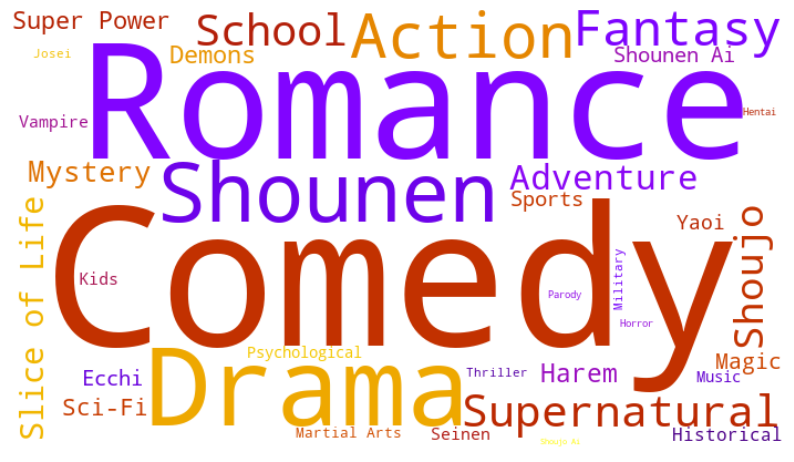

> animes highly rated by this user


,eng_version,Genres
5683,Steins;Gate,"Thriller, Sci-Fi"
6474,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power"
3537,Clannad ~After Story~,"Slice of Life, Comedy, Supernatural, Drama, Romance"
142,Princess Mononoke,"Action, Adventure, Fantasy"
404,Howl's Moving Castle,"Adventure, Drama, Fantasy, Romance"


In [36]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

# **Task 3**: **Recommending** animes for a user

In [37]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

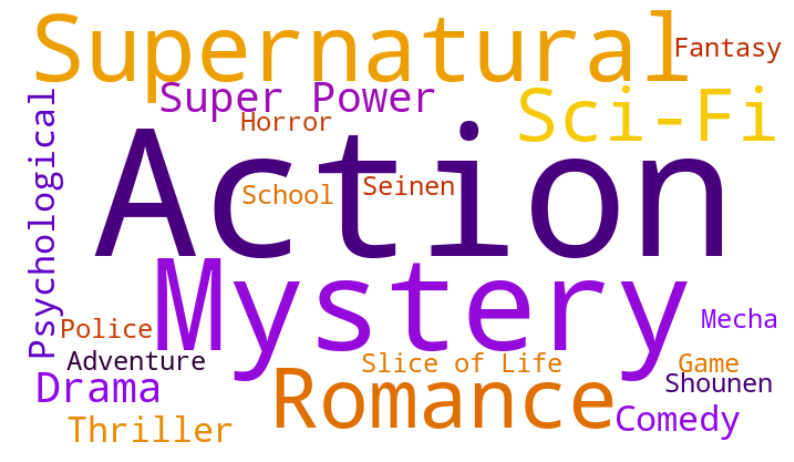


> Top recommendations for user: 109855


,n,anime_name,Genres,sypnopsis
0,4,Darker than Black,"Action, Sci-Fi, Mystery, Super Power","It has been 10 years since Heaven's Gate appeared in South America and Hell's Gate appeared in Japan, veiling the once familiar night sky with an oppressive skyscape. Their purposes unknown, these Gates are spaces in which the very laws of physics are ignored. With the appearance of the Gates emerged Contractors, who, in exchange for their humanity, are granted supernatural abilities. In the Japanese city surrounding Hell’s Gate, Section 4 Chief Misaki Kirihara finds herself at odds with an infamous Contractor codenamed Hei. Called ""Black Reaper"" in the underground world, Hei, like his associates, undertakes missions for the mysterious and ruthless Syndicate while slowly peeling back the dark layers covering a nefarious plot that threatens the very existence of Contractors. From the mind of Tensai Okamura comes a sci-fi thriller taking the form of a subtle exposé on a war in which political positions and justice have no sway—a war waged exclusively in the shadows."
1,4,Durarara!!,"Action, Mystery, Supernatural","In Tokyo's downtown district of Ikebukuro, amidst many strange rumors and warnings of anonymous gangs and dangerous occupants, one urban legend stands out above the rest—the existence of a headless ""Black Rider"" who is said to be seen driving a jet-black motorcycle through the city streets. Mikado Ryuugamine has always longed for the excitement of the city life, and an invitation from a childhood friend convinces him to move to Tokyo. Witnessing the Black Rider on his first day in the city, his wishes already seem to have been granted. But as supernatural events begin to occur, ordinary citizens like himself, along with Ikebukuro's most colorful inhabitants, are mixed up in the commotion breaking out in their city."
2,4,Psycho-Pass,"Action, Sci-Fi, Police, Psychological","Justice, and the enforcement of it, has changed. In the 22nd century, Japan enforces the Sibyl System, an objective means of determining the threat level of each citizen by examining their mental state for signs of criminal intent, known as their Psycho-Pass. Inspectors uphold the law by subjugating, often with lethal force, anyone harboring the slightest ill-will; alongside them are Enforcers, jaded Inspectors that have become latent criminals, granted relative freedom in exchange for carrying out the Inspectors' dirty work. Into this world steps Akane Tsunemori, a young woman with an honest desire to uphold justice. However, as she works alongside veteran Enforcer Shinya Kougami, she soon learns that the Sibyl System's judgments are not as perfect as her fellow Inspectors assume. With everything she has known turned on its head, Akane wrestles with the question of what justice truly is, and whether it can be upheld through the use of a system that may already be corrupt."
3,4,Elfen Lied,"Action, Horror, Psychological, Supernatural, Drama, Romance, Seinen","ucy is a special breed of human referred to as ""Diclonius,"" born with a short pair of horns and invisible telekinetic hands that lands her as a victim of inhumane scientific experimentation by the government. However, once circumstances present her an opportunity to escape, Lucy, corrupted by the confinement and torture, unleashes a torrent of bloodshed as she escapes her captors. During her breakout, she receives a crippling head injury that leaves her with a split personality: someone with the mentality of a harmless child possessing limited speech capacity. In this state of instability, she stumbles upon two college students, Kouta and his cousin Yuka, who unknowingly take an injured fugitive into their care, unaware of her murderous tendencies. This act of kindness will change their lives, as they soon find themselves dragged into the shadowy world of government secrecy and conspiracy."
4,4,Daily Lives of High School Boys,"Slice of Life, Comedy, School","oaming the halls of the all-boys Sanada No

In [38]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

# **Ranking based Recommendation**

In [39]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user] # Find anime already watched by the user
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values) # Get anime NOT yet watched
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys())) # Keep only those anime that exist in encoded dictionary
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched] # Convert anime IDs to encoded indices

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched) # Create model input (user, anime) pairs
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten() # Predict rating for each unseen anime

top_ratings_indices = (-ratings).argsort()[:10] # Get indices of top 10 highest predicted scores

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices # Get the real anime IDs for top recommendations
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched): # Create the final RESULTS list
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False).reset_index(drop=True)
Results.index = Results.index + 1   # to make it 1–10
Results

Showing recommendations for user: 109855
536/536 [==============================] - 3s 3ms/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
1,Psychic Detective Yakumo,0.954119,"Mystery, Horror, Supernatural","Haruka Ozawa's sophomore year is getting seriously scary. One of her friends is possessed, another has committed suicide and Haruka could be the next one to flunk the still-breathing test. Her only way out of this potentially lethal dead end? Yakumo Saito, an enigmatic student born with a mysterious red eye that allows him to see and communicate with the dead. But the deceased don't always desist and some killers are more than ready to kill again to keep dead men from telling any more tales. That doesn't stop Haruka's knack for digging up buried secrets, and there's even more evidence of bodies being exhumed by both Yakumo's police contact and an investigative journalist with a newly made corpse in her closet! Can this pair of anything but normal paranormal detectives solve the ultimate dead case files or will they end up in cold storage themselves? (Source: Sentai Filmworks)"
2,The Seven Metamorphoses of Yamato Nadeshiko,0.952172,"Comedy, Shoujo","Ever since her crush rejected her by insulting her appearance, Sunako Nakahara has been a shut-in with a hatred for beauty, embracing all things morbid and occult-related. She is sent to live in her aunt's mansion which, to her dismay, she'll share with four exceedingly handsome boys her age. Furthermore, her flighty aunt has made a deal with these boys that in exchange for living there rent-free, they are to turn Sunako into a proper lady by the time she returns from a trip around the world. Thus begins Sunako's hectic life with abrasive Kyohei Takano, ladies' man Ranmaru Morii, calm Takenaga Oda, and friendly Yukinojo Toyama. As she interacts with them she finds them less obnoxious, and she may not be as much of an outcast as she thought."
3,Yume-iro Pâtissière,0.940504,"Kids, School, Shoujo","side from her deep passion for eating cakes, the clumsy Ichigo Amano has never been successful at anything. After an encounter with Henri Lucas, a famous patissier, Ichigo's amazing tasting abilities—although unbeknownst to her—are discovered. Recognizing her talent, Henri offers her the chance to attend St. Marie Academy, a prestigious culinary school which specializes in desserts. In spite of the fact that she is a beginner lacking skills, thanks to Henri's recommendation, Ichigo is placed in the topmost group with the ""Sweets Princes."" The princes, famous throughout the school for their magical treats, are Sennosuke Andou, an expert in traditional Japanese sweets; Satsuki Hanabusa, with a flair for candied flowers; and Makoto Kashino, a gifted chocolatier. Ichigo and the Sweets Princes, each accompanied by their ""Sweets Spirits""—fairies who make patissiers' dreams come true—all work towards their goals in the competitive world of sweets."
4,Beelzebub: Hirotta Akachan wa Daimaou!?,0.932165,"Action, Supernatural, Comedy, School, Demons, Shounen","The story follows the ""strongest juvenile delinquent"", Oga Tatsumi, a first year in ""Ishiyama High"" the school for delinquents. One day while sleeping next to a river he sees a man floating down it, he pulls him to shore and the man splits in half revealing a baby boy. This boy is the son of the demon king and he has been chosen as the one to raise it with the baby's demon maid Hilda. The story follows his life with the child and at the delinquent school. (Source: Wikipedia)"
5,La corda d'oro:primo passo,0.928576,"Harem, Music, Comedy, Drama, Magic, Romance, School, Shoujo","Seiso Academy is a prestigious high school that sorts students into two majors: General Studies, characterized by distinct grey uniforms, and Music Studies, characterized by pristine white uniforms. While rushing to class one morning, General Studies student Kahoko Hino has a chance encounter with Lili, a small fairy searching for someone with the ability to see her. Lili flies away, and Kahoko, puzzled by their meeting, continues on her way. Later that day, the partic

In [40]:
model.save('anime_model.h5')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/kaggle/working/anime_model.h5

# Evaluation

In [ ]:
import gc
import numpy as np
from tqdm import tqdm

def batched_predict_enc(model, users_enc, animes_enc, batch_size=8192):
    import tensorflow as tf
    if len(users_enc) == 0:
        return np.array([])
    ds = tf.data.Dataset.from_tensor_slices((users_enc, animes_enc))
    ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE).map(lambda u,a: ({"user": tf.expand_dims(u, -1), "anime": tf.expand_dims(a, -1)}))
    preds = model.predict(ds, verbose=0)
    return preds.flatten()


def evaluate_sampled_ranking_safe(test_df,
                                  all_items=None,
                                  n_negatives=50,
                                  k=10,
                                  user_col='user', anime_col='anime',
                                  user_enc_map=None, anime_enc_map=None,
                                  batch_size=1024,
                                  max_users=None,
                                  random_state=42,
                                  verbose=True):
    """
    Memory-safe sampled ranking evaluation.

    - max_users: if provided, evaluate only up to that many users (useful for quick runs).
    - n_negatives: number of negative samples per positive (default reduced to 50).
    - batch_size: prediction batch_size passed to the model prediction helper.
    """
    rng = np.random.default_rng(random_state)

    # determine all_items (raw ids)
    if all_items is None:
        try:
            all_items = test_df[anime_col].unique()
        except Exception:
            if anime_enc_map is not None:
                all_items = np.array(list(anime_enc_map.keys()), dtype=np.int32)
            else:
                raise ValueError("Can't determine all_items. Provide all_items or ensure anime_enc_map exists.")
    else:
        all_items = np.array(all_items, dtype=np.int32)

    # build positive dict per user (raw ids)
    user_pos = {}
    for _, row in test_df.iterrows():
        u = int(row[user_col]); a = int(row[anime_col])
        user_pos.setdefault(u, set()).add(a)

    # limit user list
    user_list = list(user_pos.keys())
    if max_users is not None:
        user_list = user_list[:max_users]

    precisions, recalls, ndcgs, hits = [], [], [], []
    evaluated = 0

    # iterate users (memory safe)
    iterator = tqdm(user_list, desc="Eval users", disable=not verbose)
    for user_raw in iterator:
        pos_set_raw = user_pos[user_raw]

        # encode user
        if user_enc_map is not None:
            u_enc = user_enc_map.get(user_raw)
        else:
            # assume already encoded
            u_enc = user_raw if user_raw in globals().get('user_encoded2user', {}) else None
        if u_enc is None:
            continue

        # negatives pool
        neg_pool = np.setdiff1d(all_items, np.array(list(pos_set_raw)), assume_unique=True)
        if neg_pool.size == 0:
            continue

        # iterate positives for this user
        for pos_raw in pos_set_raw:
            pos_enc = (anime_enc_map.get(pos_raw) if anime_enc_map is not None else pos_raw)
            if pos_enc is None:
                continue

            sample_size = min(n_negatives, len(neg_pool))
            negs = rng.choice(neg_pool, size=sample_size, replace=False)
            candidates_raw = np.concatenate(([pos_raw], negs)).astype(np.int32)

            enc_candidates = []
            valid_raw = []
            for r in candidates_raw:
                enc = anime_enc_map.get(int(r)) if anime_enc_map is not None else int(r)
                if enc is None:
                    continue
                enc_candidates.append(enc); valid_raw.append(int(r))
            if not enc_candidates:
                continue

            users_arr = np.array([u_enc] * len(enc_candidates), dtype=np.int32)
            animes_arr = np.array(enc_candidates, dtype=np.int32)

            # predict (batched)
            scores = batched_predict_enc(model, users_arr, animes_arr, batch_size=batch_size)
            if scores.size == 0:
                continue

            k2 = min(k, len(scores))
            topk_idx = np.argpartition(-scores, k2-1)[:k2]
            topk_sorted = topk_idx[np.argsort(-scores[topk_idx])]
            topk_raw = np.array(valid_raw)[topk_sorted]

            # metrics
            hits.append(1.0 if pos_raw in topk_raw else 0.0)
            precisions.append(np.sum([1 for x in topk_raw[:k] if x in pos_set_raw]) / k)
            recalls.append(np.sum([1 for x in topk_raw[:k] if x in pos_set_raw]) / (len(pos_set_raw) + 1e-12))

            # NDCG
            dcg = 0.0
            for i, it in enumerate(topk_raw[:k]):
                rel = 1.0 if it in pos_set_raw else 0.0
                dcg += (2**rel - 1) / np.log2(i + 2)
            idcg = sum((2**1 - 1) / np.log2(i + 2) for i in range(min(len(pos_set_raw), k)))
            ndcg = dcg / idcg if idcg > 0 else 0.0
            ndcgs.append(ndcg)

            evaluated += 1

        # periodically free memory
        if evaluated % 1000 == 0:
            gc.collect()

    metrics = {
        f'Precision@{k}': float(np.mean(precisions)) if precisions else 0.0,
        f'Recall@{k}': float(np.mean(recalls)) if recalls else 0.0,
        f'NDCG@{k}': float(np.mean(ndcgs)) if ndcgs else 0.0,
        f'HitRate@{k}': float(np.mean(hits)) if hits else 0.0,
        'evaluated_pairs': int(evaluated)
    }
    return metrics


# quick safe run: 2000 users, 50 negatives, batch size 1024
sampled_metrics = evaluate_sampled_ranking_safe(
    test_df,
    all_items=df.anime_id.unique() if 'df' in globals() else None,
    n_negatives=50,
    k=10,
    user_col='user', anime_col='anime',
    user_enc_map=user2user_encoded, anime_enc_map=anime2anime_encoded,
    batch_size=1024,
    max_users=2000,
    random_state=42,
    verbose=True
)
print("Sampled ranking metrics (safe run):", sampled_metrics)


Eval users:  99%|█████████▉| 1976/2000 [14:34<00:54,  2.26s/it]